In [76]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as matplot
import numpy as np
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [77]:
main_columns = ['Frequency of consumption of vegetables', 'Number of main meals',
                'Consumption of water daily', 'Physical activity frequency',
                'Time using technology devices']

In [78]:
def exploratory_data_analysis(df):
    print("\nEXPLORATORY DATA ANALYSIS")
    for col_name in main_columns:
        df[col_name] = df[col_name].apply(round)
        value = np.array(df[col_name])
        print(col_name,':', 'Minimum:', np.min(value), 'Maximum:', np.max(value))

In [79]:
def create_mappings(df):
    vegetables_map = {1:'Never', 2:'Sometimes', 3:'Always'}
    meals_map = {1: '1', 2:'2' , 3: '3', 4: '3+'}
    water_map = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
    activity_map = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
    devices_using_map = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}
    df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(vegetables_map)
    df['Number of main meals'] = df['Number of main meals'].replace(meals_map)
    df['Consumption of water daily'] = df['Consumption of water daily'].replace(water_map)
    df['Physical activity frequency'] = df['Physical activity frequency'].replace(activity_map)
    df['Time using technology devices'] = df['Time using technology devices'].replace(devices_using_map)

In [80]:
def weight_height_comparision_box_plot(df):
    sns.set()
    fig = matplot.figure(figsize=(20,10))
    matplot.subplot(1, 2, 1)
    sns.boxplot(x='Gender', y='Height', data=df)
    matplot.subplot(1, 2, 2)
    sns.boxplot(x='Gender', y='Weight', data=df)  

In [81]:
def weight_height_comparision_lmplot(df):
  graph = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=10, data=df)
  graph.set_axis_labels("Height (cm)", "Weight (kg)")

In [82]:
def obesity_levels_with_piechart(df):
  obesity_counter = Counter(df['Obesity'])
  matplot.figure(figsize=(8,8))
  matplot.pie([float(obesity_counter[value]) for value in obesity_counter], labels=[str(key) for key in obesity_counter], autopct=None)
  matplot.title('Weight Category') 
  matplot.tight_layout()

In [83]:
def obesity_levels_for_male(df):
  male_data = df['Gender'] == 'Male'
  male_counter = Counter(df.loc[male_data, 'Obesity'])
  fig = matplot.figure(figsize=(20,8))
  matplot.subplot(1, 2, 1)
  matplot.pie([float(male_counter[value]) for value in male_counter], labels=[str(key) for key in male_counter], autopct=None)
  matplot.title('Weight Category of Male') 
  matplot.tight_layout()

In [84]:
def obesity_levels_for_female(df):
  female_data = df['Gender'] == 'Female'
  female_counter = Counter(df.loc[female_data, 'Obesity'])
  matplot.subplot(1, 2, 2)
  matplot.pie([float(female_counter[value]) for value in female_counter], labels=[str(key) for key in female_counter], autopct=None)
  matplot.title('Weight Category of Female') 
  matplot.tight_layout()

Frequency of consumption of vegetables : Minimum: 1.0 Maximum: 3.0
Number of main meals : Minimum: 1.0 Maximum: 4.0
Consumption of water daily : Minimum: 1.0 Maximum: 3.0
Physical activity frequency : Minimum: 0.0 Maximum: 3.0
Time using technology devices : Minimum: 0.0 Maximum: 2.0

EXPLORATORY DATA ANALYSIS
Frequency of consumption of vegetables : Minimum: 1 Maximum: 3
Number of main meals : Minimum: 1 Maximum: 4
Consumption of water daily : Minimum: 1 Maximum: 3
Physical activity frequency : Minimum: 0 Maximum: 3
Time using technology devices : Minimum: 0 Maximum: 2


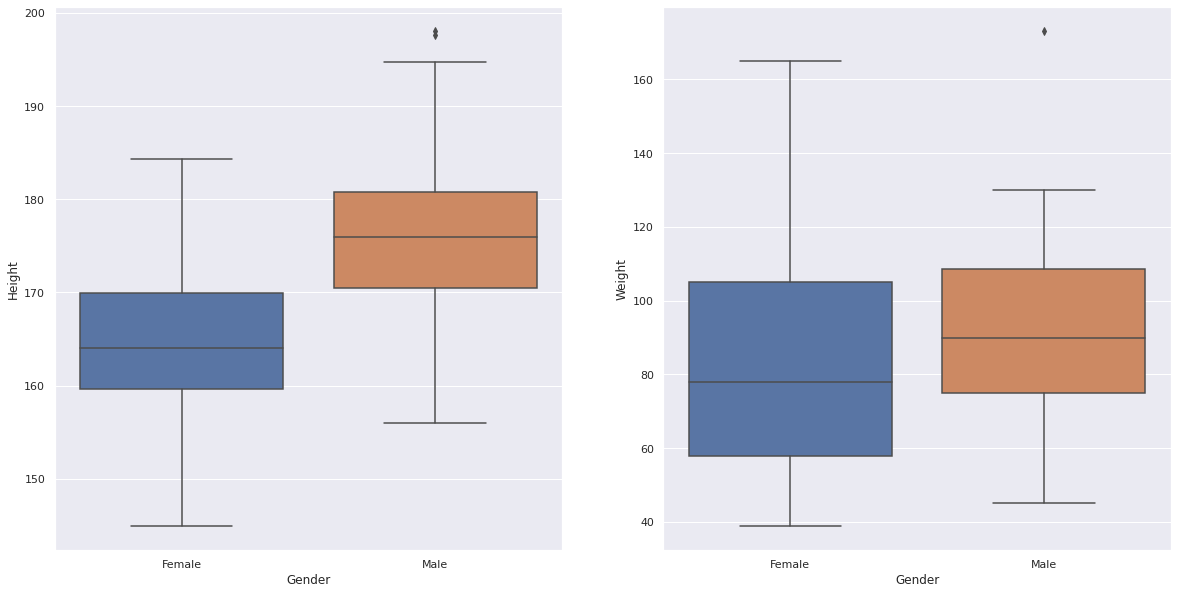

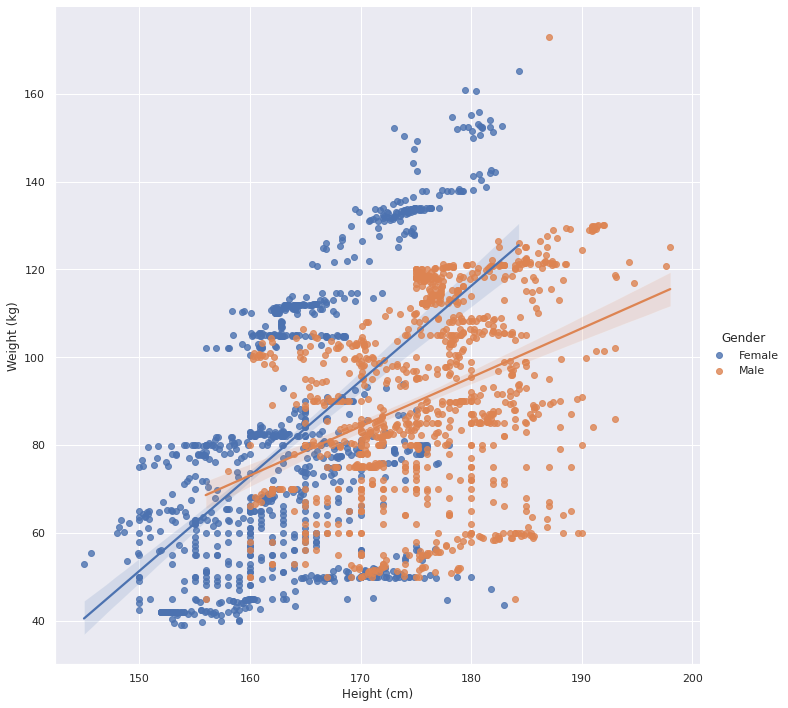

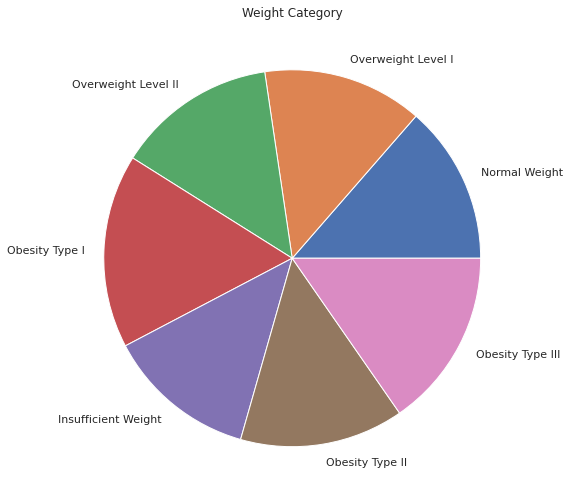

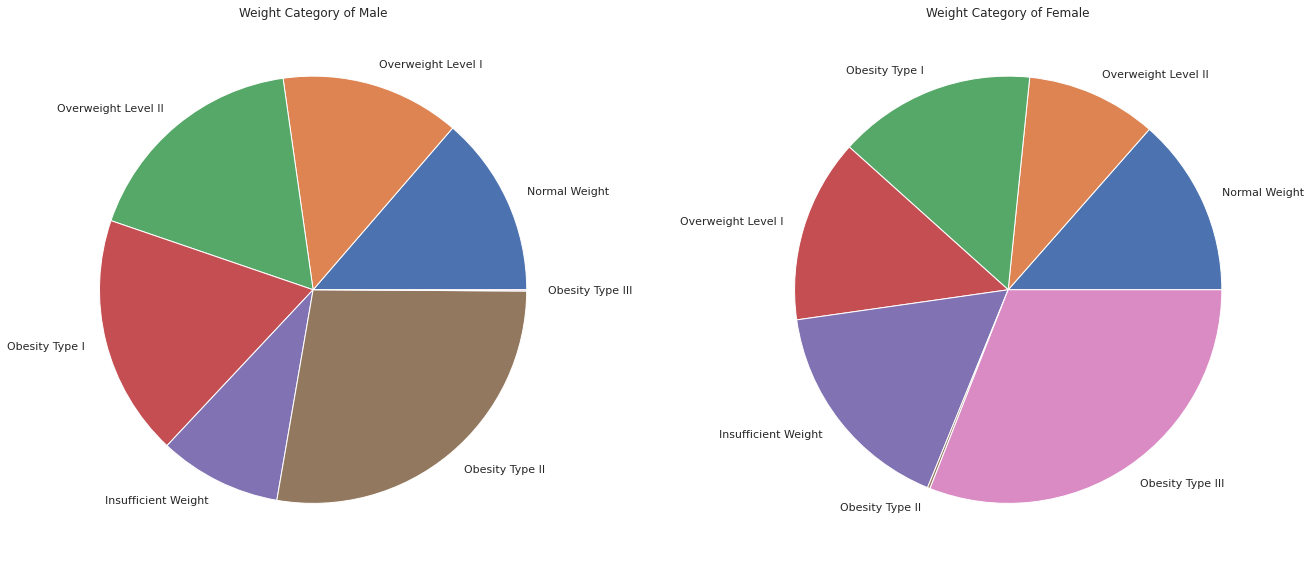

In [85]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
#Change the column names to understanable naming convention
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
  'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity'
]
#Rounding of the values 
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
for col_name in main_columns:
  value = np.array(df[col_name])
  print(col_name,':', 'Minimum:', np.min(value), 'Maximum:', np.max(value))

exploratory_data_analysis(df)
df_copy = df.copy()
create_mappings(df)
weight_height_comparision_box_plot(df)
weight_height_comparision_lmplot(df)
obesity_levels_with_piechart(df)
obesity_levels_for_male(df)
obesity_levels_for_female(df)


#DATA PREPROCESSING

In [92]:
df_copy_bool = df_copy.dtypes == object
df_copy_labels = df_copy_bool[df_copy_bool].index
false = df_copy_bool[~df_copy_bool]
non_df_copy_bool = false.index
col = [x for x in df_copy_labels]
multiple = [df_copy[x].unique() for x in df_copy_labels]

In [93]:
multiple_columns = {col: values for col, values in zip(col, multiple) if len(values)>2}
def column_number(x):
    d = {}
    d[df_copy.columns[x]] = x
    return(d)

# print([column_number(x) for x in range(0, len(df_copy.columns))])

#CREATING TEST AND TRAIN DATA

In [94]:
x = df_copy[df_copy.columns[:-1]]
y = df['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

#LABELING

In [95]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

bmi_features = ['Age', 'Height', 'Weight']
bmi_transformation = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

meals_features = ['Consumption of food between meals', 'Consumption of alcohol']
meals_transformation = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

other_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
other_transformation = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', bmi_transformation, bmi_features),
    ('Ordinal', meals_transformation, meals_features),
    ('Non-Ordinal', other_transformation, other_features)
], remainder = 'passthrough')
    
classification = Pipeline(steps=[('preprocessor', Preprocessor)])


classification.fit(x_train, y_train)


trans_df = classification.fit_transform(x_train)
cols = [y for x in [bmi_features, meals_features] for y in x]
preprocessed_columns = classification.named_steps['preprocessor'].transformers_[2][1].named_steps['Non-O'].get_feature_names(other_features)
preprocessed_columns = [x for x in preprocessed_columns]

transformed_x_train = pd.DataFrame(trans_df, columns= ['Age', 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])


label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#TRAINING MODEL AND PREDICTING

In [97]:
classifier = DecisionTreeClassifier()
pipe_line = Pipeline(steps=[('preprocessor', Preprocessor),
                  ('classifier', classifier)])
pipe_line.fit(x_train, y_train)   
acc_score = pipe_line.score(x_test, y_test)
print("MODEL SCORE: %.3f" % acc_score)
y_pred = pipe_line.predict(x_test)

target_names = [le_name_mapping[x] for x in le_name_mapping]
print(classification_report(y_test, y_pred, target_names=target_names))

MODEL SCORE: 0.943
                     precision    recall  f1-score   support

Insufficient Weight       0.96      0.96      0.96        27
      Normal Weight       0.93      0.86      0.89        29
     Obesity Type I       0.88      0.96      0.92        23
    Obesity Type II       0.97      1.00      0.98        32
   Obesity Type III       1.00      1.00      1.00        33
 Overweight Level I       0.85      0.97      0.91        30
Overweight Level II       1.00      0.87      0.93        38

           accuracy                           0.94       212
          macro avg       0.94      0.95      0.94       212
       weighted avg       0.95      0.94      0.94       212

